In [10]:
import warnings

warnings.filterwarnings('ignore')

import os
ROOT_DIR = os.getcwd()[:-28] # verify this points to the root directory of the project

from tools.modeling.deprecated.timeserieshyperparamtuner import TimeSeriesHyperParamTuner
from tools.modeling.deprecated.timeseriesmodeler import TimeSeriesModeler

from nba.common import add_game_log_lag, add_game_log_last_5
import nba.constants as c

from xgboost import XGBRegressor
from hyperopt import hp

import numpy as np
import pandas as pd

import glob
import shap



SEED = 1
early_stopping = 50
season = c.SEASON_2022_2023
player_game_log_path = ROOT_DIR + 'data/game_logs/2022-23/player'
player_game_log_csv_files = glob.glob(os.path.join(player_game_log_path, '*.csv'))

log = pd.DataFrame()

ROOT_DIR

'/Users/rmcdevi2/Projects/personal/nba-analysis/'

In [11]:
# Get Data
for f in player_game_log_csv_files:
    df = pd.read_csv(f)
    log = pd.concat([log, df], ignore_index=True)

log.to_csv(ROOT_DIR + '/data/game_logs/2022-23/player_game_log_2022-2023.csv', index=False)
log

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,TOV,STL,BLK,BLKA,PF,PFD,PTS,PLUS_MINUS,SEASON,OPP_TEAM_ID
0,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201181,2023-04-04,PHI vs. BOS,W,...,4,0,1,0,5,2,5,17,2022-23,1.610613e+09
1,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201174,2023-04-02,PHI @ MIL,L,...,1,1,0,1,1,4,29,-13,2022-23,1.610613e+09
2,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201150,2023-03-31,PHI vs. TOR,W,...,0,0,0,0,2,5,13,0,2022-23,1.610613e+09
3,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201139,2023-03-29,PHI vs. DAL,W,...,1,2,0,0,3,3,22,8,2022-23,1.610613e+09
4,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201126,2023-03-27,PHI @ DEN,L,...,0,3,0,0,1,3,29,-10,2022-23,1.610613e+09
5,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201110,2023-03-25,PHI @ PHX,L,...,3,1,0,0,1,3,37,-9,2022-23,1.610613e+09
6,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201103,2023-03-24,PHI @ GSW,L,...,1,1,0,0,4,3,21,-17,2022-23,1.610613e+09
7,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201087,2023-03-22,PHI @ CHI,W,...,0,1,0,0,1,1,21,35,2022-23,1.610613e+09
8,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201072,2023-03-20,PHI vs. CHI,L,...,2,0,1,1,1,2,22,9,2022-23,1.610613e+09
9,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22201057,2023-03-18,PHI @ IND,W,...,0,1,0,2,2,1,31,15,2022-23,1.610613e+09


In [12]:
log[c.GAME_DATE] = pd.to_datetime(log[c.GAME_DATE])
log = add_game_log_last_5(log)
log = add_game_log_lag(log)

log.sort_values(by=[c.GAME_DATE])
log

,SEASON_YEAR,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,...,FG_PCT_LAG,FGM_LAG,FGA_LAG,FG3M_LAG,FG3A_LAG,FG3_PCT_LAG,FTM_LAG,FTA_LAG,FT_PCT_LAG,PLUS_MINUS_LAG
59,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200001,2022-10-18,PHI @ BOS,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200015,2022-10-20,PHI vs. MIL,L,...,0.500,8.0,16.0,2.0,5.0,0.400,3.0,3.0,1.000,-6.0
57,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200028,2022-10-22,PHI vs. SAS,L,...,0.462,6.0,13.0,0.0,3.0,0.000,3.0,4.0,0.750,-7.0
56,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200044,2022-10-24,PHI vs. IND,W,...,0.444,8.0,18.0,3.0,8.0,0.375,6.0,9.0,0.667,-11.0
55,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200059,2022-10-26,PHI @ TOR,L,...,0.273,3.0,11.0,2.0,5.0,0.400,0.0,0.0,0.000,4.0
54,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200073,2022-10-28,PHI @ TOR,W,...,0.571,12.0,21.0,4.0,8.0,0.500,3.0,4.0,0.750,-1.0
53,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200084,2022-10-29,PHI @ CHI,W,...,0.750,15.0,20.0,9.0,12.0,0.750,5.0,6.0,0.833,29.0
52,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200097,2022-10-31,PHI @ WAS,W,...,0.357,5.0,14.0,2.0,6.0,0.333,2.0,3.0,0.667,5.0
51,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200108,2022-11-02,PHI vs. WAS,L,...,0.545,12.0,22.0,2.0,6.0,0.333,2.0,2.0,1.000,-4.0
50,2022-23,1630178,Tyrese Maxey,1610612755,PHI,Philadelphia 76ers,22200122,2022-11-04,PHI vs. NYK,L,...,0.550,11.0,20.0,5.0,9.0,0.556,5.0,8.0,0.625,-2.0


In [13]:
# Preprocess Data
PTS_PREDICTION_MASK = [c.PTS] + c.GAME_LOG_LAST_5_MASK + c.GAME_LOG_LAG_MASK
log = log[PTS_PREDICTION_MASK]
logs = log.dropna()

cats = log.select_dtypes(exclude=np.number).columns.tolist()
for col in cats:
    log[col] = log[col].astype('category')

In [14]:
rmse = {
    'base_model': 0,
    'tuned_model': 0,
}

params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'n_estimators': 1000
}

In [15]:
ts_modeler = TimeSeriesModeler(XGBRegressor())
ts_modeler.ts_train(params, log, c.PTS)
rmse['base_model'] = ts_modeler.ts_rmse()

[0]	validation_0-rmse:8.19504	validation_1-rmse:10.01893
[100]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[200]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[300]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[400]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[500]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[600]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[700]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[800]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[900]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
[999]	validation_0-rmse:0.00056	validation_1-rmse:17.17283
RSME: 17.17282593908768
[0]	validation_0-rmse:7.27229	validation_1-rmse:6.55914
[100]	validation_0-rmse:0.00055	validation_1-rmse:5.69856
[200]	validation_0-rmse:0.00055	validation_1-rmse:5.69856
[300]	validation_0-rmse:0.00055	validation_1-rmse:5.69856
[400]	validation_0-rmse:0.00055	validation_1-rmse:5.69856
[500]	validation_0-rmse:0.00055	validatio

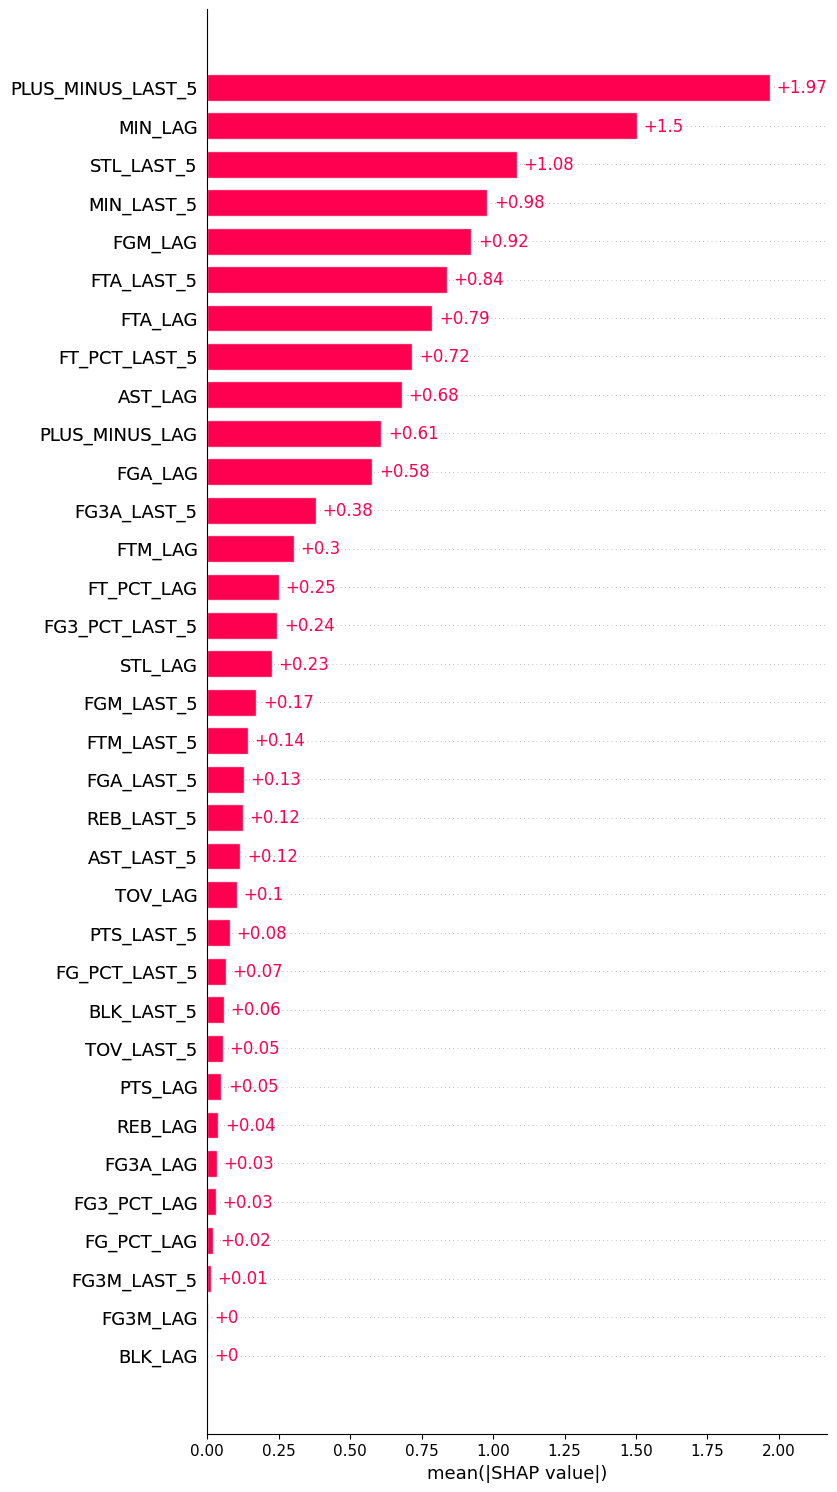

In [16]:
shap.plots.bar(ts_modeler.shap_values(), max_display=100)

In [17]:
space = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': hp.quniform('max_depth', 3, 18, 1),
    'gamma': hp.uniform('gamma', 1, 9),
    'reg_alpha': hp.quniform('reg_alpha', 40, 180, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1),
    'min_child_weight': hp.quniform('min_child_weight', 0, 10, 1),
    'eta': hp.quniform('eta', 0.025, 0.5, 0.025),
    'subsample': hp.quniform('subsample', 0.5, 1, 0.05),
    'n_estimators': hp.quniform('n_estimators', 100, 1000, 1),
}

tuner = TimeSeriesHyperParamTuner(ts_modeler, space)
best = tuner.ts_optimize(250, log, c.PTS)
best

  0%|          | 0/250 [00:00<?, ?trial/s, best loss=?]


AttributeError: 'numpy.random._generator.Generator' object has no attribute 'randint'

In [ ]:
ts_modeler.ts_train(best, log, c.PTS)
rmse['tuned_model'] = ts_modeler.ts_rmse()
rmse

In [ ]:
shap.plots.bar(ts_modeler.shap_values(), max_display=100)